## Import Modules

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import random
import tensorflow as tf
from tensorflow import keras

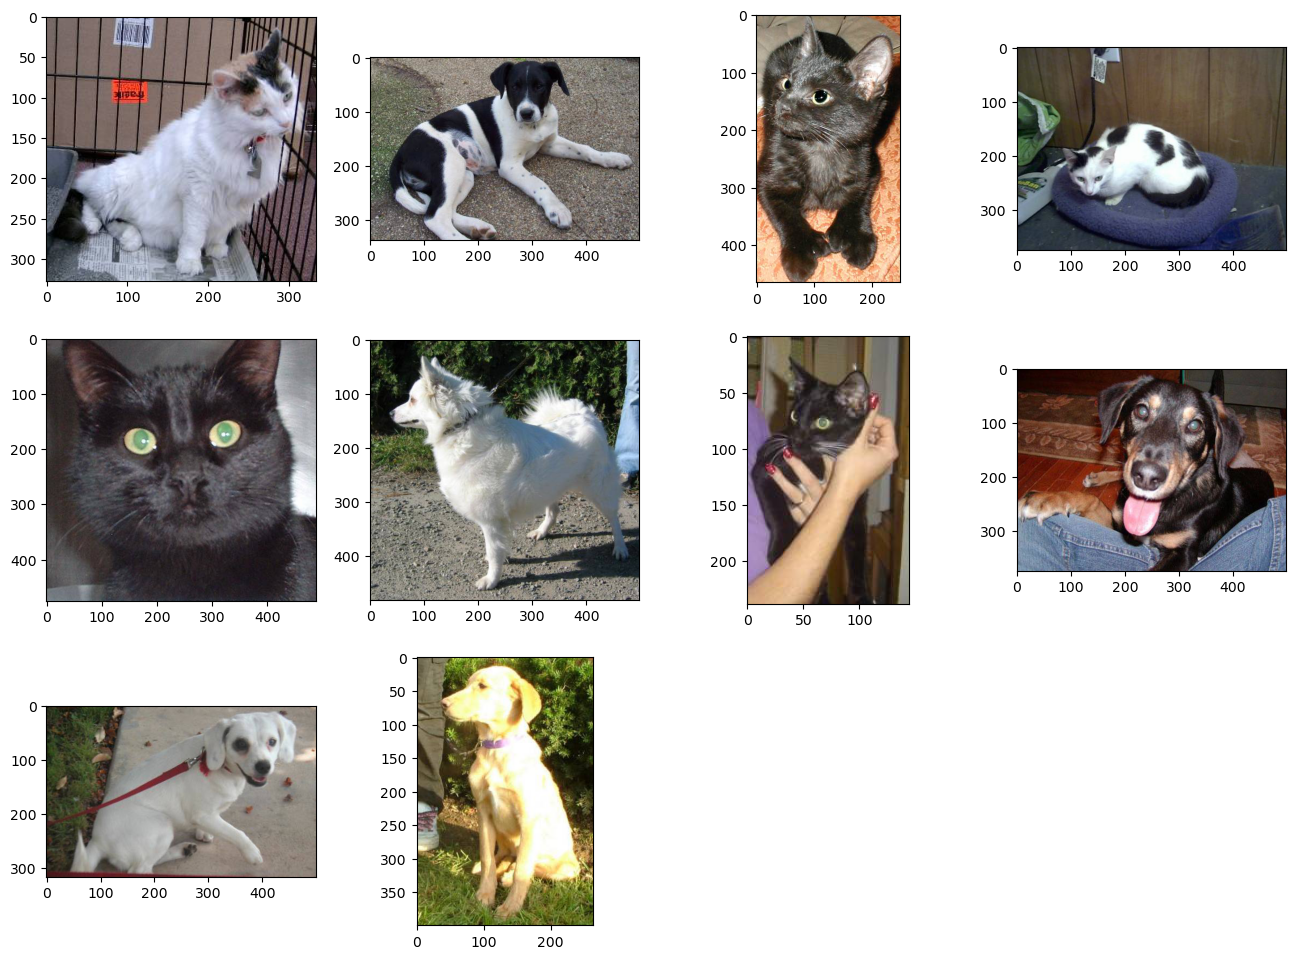

In [3]:
main_dir = "dataset"
train_dir = "train"
path = os.path.join(main_dir, train_dir)
images = os.listdir(path)
plt.figure(figsize=(16, 16))

for i in range(10):
   img = random.choice([x for x in images])
   fig = plt.subplot(4, 4, i + 1)
   img = mpimg.imread(os.path.join(path, img))
   fig.imshow(img)

In [4]:
X = []
y = []
convert = lambda category : int(category == "dog")

for p in os.listdir(path):
    category = p.split(".")[0]
    category = convert(category)
    img_array = cv2.imread(os.path.join(path, p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X.append(new_img_array)
    y.append(category)
    
X = np.array(X).reshape(-1, 80, 80, 1)
y = np.array(y)

### Normalize Data

In [4]:
X = X / 255.0

### Define CNN model

In [5]:
# model = keras.models.Sequential()

# # Adds a densly-connected layer with 64 units to the model
# model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=X.shape[1:]))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# # Add another layer
# model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation="relu"))

# # Add a softmax layer with 10 output units
# model.add(keras.layers.Dense(1, activation="sigmoid"))

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model = keras.models.Sequential()

# Adds a densly-connected layer to the model
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Add another layer
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# And another layer
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Guess what..? Add another layer
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Flatten, then feed the data to the Dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

### Complie the model

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=["accuracy"])

### Data Pre-Processing

### Fit Model with Training Data

In [6]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5894 - accuracy: 0.6881 - val_loss: 0.7725 - val_accuracy: 0.5196
Epoch 2/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4844 - accuracy: 0.7693 - val_loss: 0.3756 - val_accuracy: 0.8544
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.4294 - accuracy: 0.8024 - val_loss: 0.4665 - val_accuracy: 0.7912
Epoch 4/10
625/625 [==============================] - 81s 130ms/step - loss: 0.3958 - accuracy: 0.8219 - val_loss: 0.4986 - val_accuracy: 0.7712
Epoch 5/10
625/625 [==============================] - 79s 126ms/step - loss: 0.3522 - accuracy: 0.8440 - val_loss: 0.5016 - val_accuracy: 0.7822
Epoch 6/10
625/625 [==============================] - 76s 122ms/step - loss: 0.3137 - accuracy: 0.8663 - val_loss: 0.4981 - val_accuracy: 0.7968
Epoch 7/10
625/625 [==============================] - 78s 125ms/step - loss: 0.2648 - accuracy: 0.8867 - val_loss: 0.8899 - val_ac

### Pre-process Test Data

In [7]:
# train_dir = "test"
# path = os.path.join(main_dir, train_dir)

# X_test = []
# id_line = []

# for p in os.listdir(path):
#     id_line.append(p.split(".")[0])
#     img_array = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
#     new_img_array = cv2.resize(img_array, dsize=(80, 80))
#     X_test.append(new_img_array)
    
# X_test = np.array(X_test).reshape(-1, 80, 80, 1)
# X_test = X_test / 255

### Making predictions With Test Data

In [8]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]

391/391 [==============================] - 10s 26ms/step


### Make Data Frame from Results

In [11]:
df = pd.DataFrame({"id": id_line, "label": predicted_val})

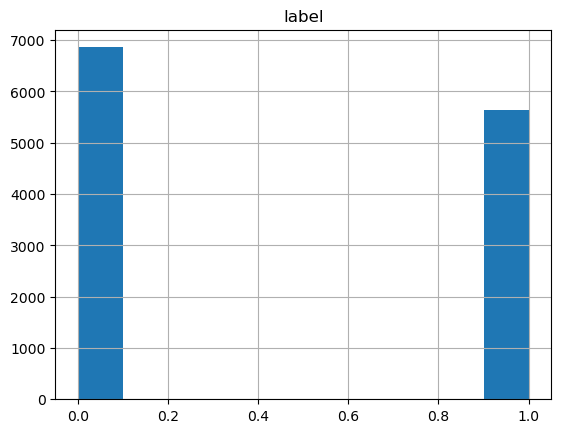

In [13]:
df.hist()
plt.show()